# K-pop Idols

* **Data:** `kpop_idols.csv`
* **Description:** K-pop is Korean pop music. It's popular the world over, especially when their fans take over Twitter hashtags. Idols are the individual musicians. Note that this dataset is not necessarily current k-pop idols, but includes people from the past, too (for example: group memberships might not be current).
* **Source:** https://www.kaggle.com/kimjihoo/kpopdb
* **Columns of interest:**
    * These are pretty self-explanatory. Just know "Birthplace" is the city they were born in, while "Country" is the country.

## Read in your data

In [1]:
# %load ../pandas.py
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'  # make a cell execute multiple command and return the result in the same cell

%config InlineBackend.figure_format='svg' # increase the picture resolution
# plt.rcParams['figure.dpi']=120

pd.options.display.float_format='{:,.2f}'.format # the number values are displayed with thousand separator and with two decimal points
pd.set_option('display.max_colwidth', None) # show the whole column


In [2]:
df=pd.read_csv('../data/kpop_idols.csv')
df.head()

,Stage Name,Full Name,Korean Name,K. Stage Name,Date of Birth,Group,Country,Birthplace,Other Group,Gender
0,A.M,Seong Hyunwoo,성현우,에이엠,1996-12-31,Limitless,South Korea,NaN,NaN,M
1,Ace,Jang Wooyoung,장우영,에이스,1992-08-28,VAV,South Korea,NaN,NaN,M
2,Aeji,Kwon Aeji,권애지,애지,1999-10-25,Hashtag,South Korea,Daegu,NaN,F
3,AhIn,Lee Ahin,이아인,아인,1999-09-27,MOMOLAND,South Korea,Wonju,NaN,F
4,Ahra,Go Ahra,고아라,아라,2001-02-21,Favorite,South Korea,Yeosu,NaN,F


## What is the percentage of male vs female kpop idols?

In [3]:
df['Gender'].value_counts()
print()
df['Gender'].value_counts(normalize=True, dropna=False)

M    676
F    634
Name: Gender, dtype: int64

M   0.52
F   0.48
Name: Gender, dtype: float64

## Not all idols are born in South Korea: make a horizontal bar plot of the top five countries they're from, with the longest bar at the top.

<AxesSubplot:>

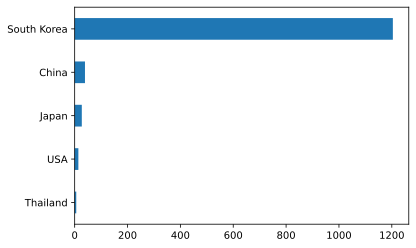

In [4]:
df['Country'].value_counts().head(5).sort_values().plot(kind='barh')

<AxesSubplot:>

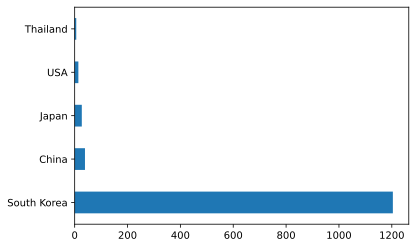

In [5]:
df['Country'].value_counts().head(5).sort_values(ascending=False).plot(kind='barh')

## For **only** the idols born in China, what are the top 3 cities they were born in?

In [6]:
df[df['Country']=='China']['Birthplace'].value_counts().head(3)

Shanghai    3
Wuhan       2
Qingdao     2
Name: Birthplace, dtype: int64

## What group has the most members in our dataset?

In [7]:
df['Group'].value_counts()

NCT             18
14U             14
Cosmic Girls    13
Seventeen       13
The Boyz        12
                ..
Rockit Girl      2
15&              2
JBJ95            1
Nature           1
Good Day         1
Name: Group, Length: 208, dtype: int64

## Save a CSV file of just the members of Cosmic Girls, calling it `cosmic-girls.csv`.

Count just the `Group` column.

In [8]:
df[df['Group']=='Cosmic Girls'].to_csv('cosmic-girls.csv', index=False)

In [9]:
cg=pd.read_csv('cosmic-girls.csv')
cg

,Stage Name,Full Name,Korean Name,K. Stage Name,Date of Birth,Group,Country,Birthplace,Other Group,Gender
0,Bona,Kim Jiyeon,김지연,보나,1995-08-19,Cosmic Girls,South Korea,Daegu,NaN,F
1,Cheng Xiao,Cheng Xiao,청샤오,성소,1998-07-15,Cosmic Girls,China,Shenzhen,NaN,F
2,Dawon,Nam Dawon,남다원,다원,1997-03-16,Cosmic Girls,South Korea,Seoul,NaN,F
3,Dayoung,Im Dayoung,임다영,다영,1999-05-14,Cosmic Girls,South Korea,Jeju,NaN,F
4,Eunseo,Son Juyeon,손주연,은서,1998-05-27,Cosmic Girls,South Korea,Incheon,NaN,F
5,Exy,Chu Sojung,추소정,엑시,1995-11-06,Cosmic Girls,South Korea,Busan,NaN,F
6,Luda,Lee Luda,이루다,루다,1997-03-06,Cosmic Girls,South Korea,Seoul,WJMK,F
7,Meiqi,Meng Meiqi,멍메이치,미기,1998-10-15,Cosmic Girls,China,Luoyang,NaN,F
8,Seola,Kim Hyunjung,김현정,설아,1994-12-24,Cosmic Girls,South Korea,Seoul,WJMK,F
9,Soobin,Park Soobin,박수빈,수빈,1996-09-14,Cosmic Girls,South Korea,Seoul,NaN,F


## How many idols are members of `Super Junior-M`?

Count both `Group` and `Other Group`.

In [10]:
df[df['Group']=='Super Junior-M']

,Stage Name,Full Name,Korean Name,K. Stage Name,Date of Birth,Group,Country,Birthplace,Other Group,Gender
335,Henry,Henry Lau,헨리 라우,헨리,1989-10-11,Super Junior-M,Canada,Toronto,NaN,M
1303,Zhou Mi,Zhou Mi,조미,조미,1986-04-19,Super Junior-M,China,Wuhan,NaN,M


In [11]:
df[df['Other Group']=='Super Junior-M']

,Stage Name,Full Name,Korean Name,K. Stage Name,Date of Birth,Group,Country,Birthplace,Other Group,Gender
179,Donghae,Lee Donghae,이동해,동해,1986-10-15,Super Junior,South Korea,Mokpo,Super Junior-M,M
221,Eunhyuk,Lee Hyukjae,이혁재,은혁,1986-04-04,Super Junior,South Korea,Ilsan,Super Junior-M,M
676,Kyuhyun,Cho Kyuhyun,조규현,규현,1988-02-03,Super Junior,South Korea,Seoul,Super Junior-M,M
876,Ryeowook,Kim Ryeowook,김려욱,려욱,1987-06-21,Super Junior,South Korea,Incheon,Super Junior-M,M
979,Siwon,Choi Siwon,최시원,시원,1986-04-07,Super Junior,South Korea,Seoul,Super Junior-M,M
1046,Sungmin,Lee Sungmin,이성민,성민,1986-01-01,Super Junior,South Korea,Gyeonggi,Super Junior-M,M


In [12]:
df[(df['Group']=='Super Junior-M') | (df['Other Group']=='Super Junior-M')]

,Stage Name,Full Name,Korean Name,K. Stage Name,Date of Birth,Group,Country,Birthplace,Other Group,Gender
179,Donghae,Lee Donghae,이동해,동해,1986-10-15,Super Junior,South Korea,Mokpo,Super Junior-M,M
221,Eunhyuk,Lee Hyukjae,이혁재,은혁,1986-04-04,Super Junior,South Korea,Ilsan,Super Junior-M,M
335,Henry,Henry Lau,헨리 라우,헨리,1989-10-11,Super Junior-M,Canada,Toronto,NaN,M
676,Kyuhyun,Cho Kyuhyun,조규현,규현,1988-02-03,Super Junior,South Korea,Seoul,Super Junior-M,M
876,Ryeowook,Kim Ryeowook,김려욱,려욱,1987-06-21,Super Junior,South Korea,Incheon,Super Junior-M,M
979,Siwon,Choi Siwon,최시원,시원,1986-04-07,Super Junior,South Korea,Seoul,Super Junior-M,M
1046,Sungmin,Lee Sungmin,이성민,성민,1986-01-01,Super Junior,South Korea,Gyeonggi,Super Junior-M,M
1303,Zhou Mi,Zhou Mi,조미,조미,1986-04-19,Super Junior-M,China,Wuhan,NaN,M


## Create a new column called `age` that is the age of the idol.

There are a few ways you can do this, but when calculating the age **just use the year**, you don't need to worry if they've had a birthday or not in 2021. For example, A.M. was born in 1996, so we would say she is **2021 - 1996 = 25 years old**.

In [13]:
df.info()
df['Date of Birth']=pd.to_datetime(df['Date of Birth'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Stage Name     1310 non-null   object
 1   Full Name      1304 non-null   object
 2   Korean Name    1304 non-null   object
 3   K. Stage Name  1309 non-null   object
 4   Date of Birth  1310 non-null   object
 5   Group          1219 non-null   object
 6   Country        1310 non-null   object
 7   Birthplace     689 non-null    object
 8   Other Group    122 non-null    object
 9   Gender         1310 non-null   object
dtypes: object(10)
memory usage: 102.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Stage Name     1310 non-null   object        
 1   Full Name      1304 non-null   object        
 2   Korean Name    130

In [14]:
from datetime import datetime, date

today=date.today()
df['age']= today.year-df['Date of Birth'].dt.year
df['age']=df['age'].astype(int)

df.head()

,Stage Name,Full Name,Korean Name,K. Stage Name,Date of Birth,Group,Country,Birthplace,Other Group,Gender,age
0,A.M,Seong Hyunwoo,성현우,에이엠,1996-12-31,Limitless,South Korea,NaN,NaN,M,26
1,Ace,Jang Wooyoung,장우영,에이스,1992-08-28,VAV,South Korea,NaN,NaN,M,30
2,Aeji,Kwon Aeji,권애지,애지,1999-10-25,Hashtag,South Korea,Daegu,NaN,F,23
3,AhIn,Lee Ahin,이아인,아인,1999-09-27,MOMOLAND,South Korea,Wonju,NaN,F,23
4,Ahra,Go Ahra,고아라,아라,2001-02-21,Favorite,South Korea,Yeosu,NaN,F,21


In [15]:
# Another way is like below

# df['age']=today.year-df['Date of Birth'].str.slice(0, 4)
# df['age']=today.year-df['Date of Birth'].str.split('-').str[0].astype(int)

In [16]:
from datetime import date

def calculateAge(birthDate):
    today = date.today()
    age = today.year - birthDate.year - ((today.month, today.day) < (birthDate.month, birthDate.day))
    return age

# if ((today.month, today.day) < (birthDate.month, birthDate.day)) is true then it becomes 1 otherwise 0 

print(calculateAge(date(1997, 2, 3)), "years")


df['age_bd']=df['Date of Birth'].apply(calculateAge)

df.head()


25 years


,Stage Name,Full Name,Korean Name,K. Stage Name,Date of Birth,Group,Country,Birthplace,Other Group,Gender,age,age_bd
0,A.M,Seong Hyunwoo,성현우,에이엠,1996-12-31,Limitless,South Korea,NaN,NaN,M,26,25
1,Ace,Jang Wooyoung,장우영,에이스,1992-08-28,VAV,South Korea,NaN,NaN,M,30,29
2,Aeji,Kwon Aeji,권애지,애지,1999-10-25,Hashtag,South Korea,Daegu,NaN,F,23,22
3,AhIn,Lee Ahin,이아인,아인,1999-09-27,MOMOLAND,South Korea,Wonju,NaN,F,23,22
4,Ahra,Go Ahra,고아라,아라,2001-02-21,Favorite,South Korea,Yeosu,NaN,F,21,21


## Who are the four youngest idols in our dataset?

In [17]:
df.loc[df['age'].nsmallest(4).index]

,Stage Name,Full Name,Korean Name,K. Stage Name,Date of Birth,Group,Country,Birthplace,Other Group,Gender,age,age_bd
142,Dahyun,Jeong Dahyun,정다현,다현,2005-04-29,Rocket Punch,South Korea,NaN,NaN,F,17,17
332,Heesun,Park Heesun,박희선,희선,2005-01-25,Pink Fantasy,South Korea,NaN,NaN,F,17,17
1213,Yeseo,Kang Yeseo,강예서,예서,2005-08-22,Busters,South Korea,NaN,NaN,F,17,16
1307,Zoa,Cho Hyewon,조혜원,조아,2005-05-31,Weeekly,South Korea,NaN,NaN,F,17,17


In [18]:
df.sort_values(by='age').head(4) # there is a possibility that there are more people whose age is 17

,Stage Name,Full Name,Korean Name,K. Stage Name,Date of Birth,Group,Country,Birthplace,Other Group,Gender,age,age_bd
142,Dahyun,Jeong Dahyun,정다현,다현,2005-04-29,Rocket Punch,South Korea,NaN,NaN,F,17,17
1307,Zoa,Cho Hyewon,조혜원,조아,2005-05-31,Weeekly,South Korea,NaN,NaN,F,17,17
1213,Yeseo,Kang Yeseo,강예서,예서,2005-08-22,Busters,South Korea,NaN,NaN,F,17,16
332,Heesun,Park Heesun,박희선,희선,2005-01-25,Pink Fantasy,South Korea,NaN,NaN,F,17,17


In [19]:
df['age'].min()

17

In [20]:
df[df['age']==df['age'].min()]

,Stage Name,Full Name,Korean Name,K. Stage Name,Date of Birth,Group,Country,Birthplace,Other Group,Gender,age,age_bd
142,Dahyun,Jeong Dahyun,정다현,다현,2005-04-29,Rocket Punch,South Korea,NaN,NaN,F,17,17
332,Heesun,Park Heesun,박희선,희선,2005-01-25,Pink Fantasy,South Korea,NaN,NaN,F,17,17
1213,Yeseo,Kang Yeseo,강예서,예서,2005-08-22,Busters,South Korea,NaN,NaN,F,17,16
1307,Zoa,Cho Hyewon,조혜원,조아,2005-05-31,Weeekly,South Korea,NaN,NaN,F,17,17


## What is the median age of male vs female idols?

In [21]:
df[df['Gender']=='M']['age'].median()
df[df['Gender']=='F']['age'].median()

27.0

26.0

In [22]:
df.groupby('Gender')['age'].median()

Gender
F   26.00
M   27.00
Name: age, dtype: float64